# Import Packages

In [167]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set Graph Styles
plt.style.use('ggplot')

# Import Data

In [168]:
# Import CSV from VTrans Crash Data Query Tool (1/1/2021-12/31/2021)
df1 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 1.csv')
df2 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 2.csv')
df3 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 3.csv')
df4 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 4.csv')
df5 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 5.csv')
df6 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 6.csv')
df7 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 7.csv')
df8 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 8.csv')
df9 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 9.csv')
df10 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 10.csv')
df11 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 11.csv')
df12 = pd.read_csv('/Users/mattmcbride/Desktop/VT Crash Data/VT Crash 2021 12.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])


# Clean Data

In [176]:
# Covert to Date Time
df['Formatted Date'] = pd.to_datetime(df['Crash Date'])

# Exteact Month and Date and Put into columns
df['Month'] = df['Formatted Date'].dt.strftime('%b')
df['Day'] = df['Formatted Date'].dt.day

# Convert Date to Correct Format
df['Formatted Date'] = df['Formatted Date'].dt.strftime('%m-%d-%Y')

# Replace 'none' with 'No Impairment'
df['Impairment'] = df['Impairment'].replace('None', 'No Impairment')

In [170]:
df.head()

,ObjectID,Mapped,Crash Date,City/Town,Address,AOT Route,Crash Type,Collision Direction,Weather,Road Group,Report Number,Reporting Agency,Road Group ID,AOT Actual Milepoint,Animal,Time of Day,Intersection With,Impairment,Involving,Non Reportable Address,Reporting Agency ID,Road Characteristics,Road Condition,Street Address,Surface Condition,AOT Route ID,Coordinates,Formatted Date,Month,Day
0,5918953,NaN,"January 1, 2021 at 1:44 AM",Rupert,495 VT-315,VT-315 TH,Property Damage Only,Single Vehicle Crash,Clear,Federal Aid Secondary System (Class 2 TH),21B300001,VSP - B3 Shaftsbury,3,0.49,None/Other,Night,Pawlet Mountain Rd,Alcohol,None,NaN,VTVSP0900,Not at a Junction,None,495 VT-315,Dry,S0122,"43.26357645449434,-73.2147557956943",01-01-2021,Jan,1
1,5920167,NaN,"January 1, 2021 at 4:18 AM",Ira,Blue Star Drive,VT-4A,Injury,Single Vehicle Crash,Clear,"State Highway numbered route, State owned",21B400006,VSP - B4 Rutland,10,0.83,None/Other,Night,Birdeye Road,Alcohol,None,NaN,VTVSP0300,Not at a Junction,None,Blue Star Drive,Dry,0041,"43.60805356822602,-73.09710656530845",01-01-2021,Jan,1
2,5918537,NaN,"January 1, 2021 at 5:09 AM",Barre Town,E Barre Rd,US-302,Injury,Single Vehicle Crash,Cloudy,"State Highway numbered route, State owned",21BT000002,Barre Town PD,10,0.99,None/Other,Night,Benoit Dr,None,None,NaN,VT0120500,Not at a Junction,None,E Barre Rd,Dry,3020,"44.17683937617899,-72.46875564923928",01-01-2021,Jan,1
3,5923228,NaN,"January 1, 2021 at 5:13 AM",Burlington,325 S Willard St,US-7,Property Damage Only,Rear End,Clear,"State Highway numbered route, State owned",21BU000016,Burlington PD,10,1.78,None/Other,Night,Spruce St,None,None,NaN,VT0040100,Not at a Junction,None,325 S Willard St,Dry,0070,"44.471058563709306,-73.2050865082867",01-01-2021,Jan,1
4,5918959,NaN,"January 1, 2021 at 8:15 AM",Stratton,307 Stratton Arlington Road,STRATTON ARLINGTON RD,Injury,Single Vehicle Crash,Clear,Federal Aid Secondary System (Class 2 TH),21B100006,VSP - B1 Westminster,3,7.13,None/Other,Day,Pike Hollow Road,None,None,NaN,VTVSP1600,Not at a Junction,"Road Surface Condition(wet, icy, snow, slush, ...",307 Stratton Arlington Road,Ice,S0114,"43.02781303703482,-72.87976972435561",01-01-2021,Jan,1


# Analysis

## 2021 Fatal Car Crashes by Month

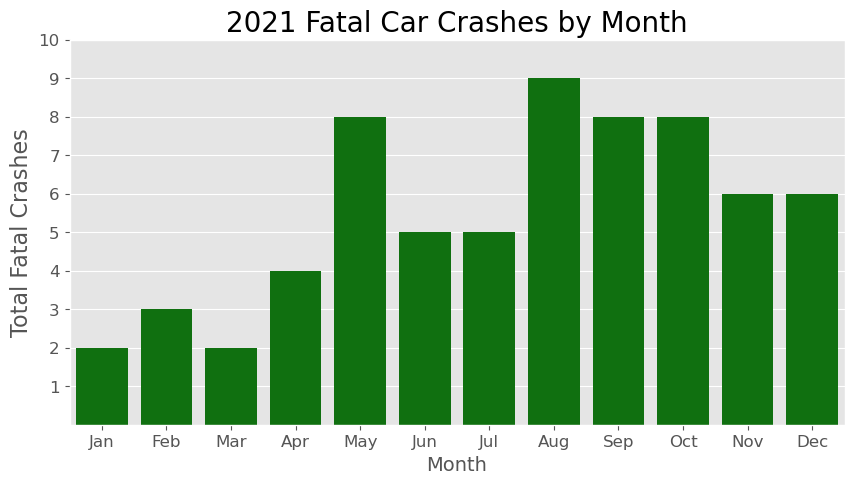

In [171]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter Crashes
fatal_crashes = df[df['Crash Type']=='Fatal']

# Group fatal_crashes by month and get size of each group
fatal_crashes_by_month = fatal_crashes.groupby('Month')['Crash Type'].size().reset_index(name='Total Fatal Crashes')

# Set Plot Size
plt.subplots(figsize=(10,5))

# Plot
sns.barplot(x='Month', y='Total Fatal Crashes', data=fatal_crashes_by_month, order=month_order, color='green')

# Format
plt.xlabel('Month', fontsize=14)  # Adjust the x-label fontsize
plt.ylabel('Total Fatal Crashes', fontsize=16)  # Adjust the y-label fontsize
plt.yticks(range(1, 11), fontsize=12)
plt.xticks(fontsize=12)
plt.title('2021 Fatal Car Crashes by Month', fontsize=20)

plt.show()

## 2021 Injury Causing Car Crashes by Month

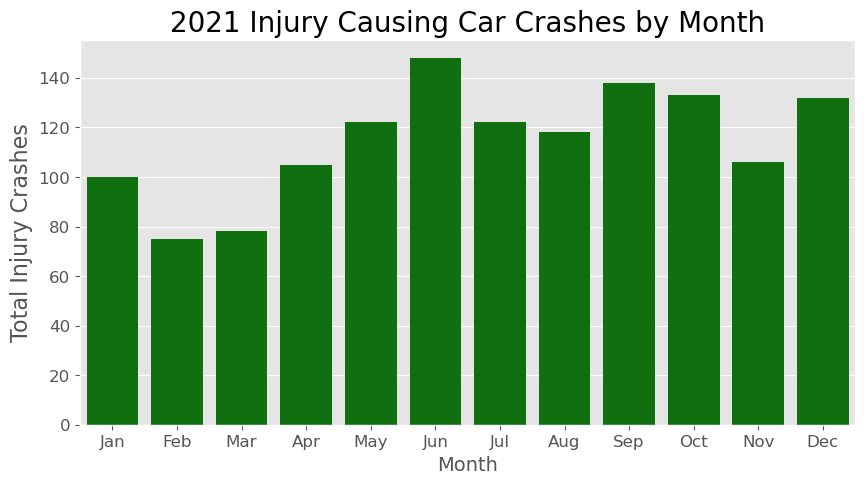

In [172]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter Crashes
injury_crashes = df[df['Crash Type']=='Injury']

# Group fatal_crashes by month and get size of each group
injury_crashes_by_month = injury_crashes.groupby('Month')['Crash Type'].size().reset_index(name='Total Injury Causing Crashes')

# Set Plot Size
plt.subplots(figsize=(10,5))

# Plot
sns.barplot(x='Month', y='Total Injury Causing Crashes', data=injury_crashes_by_month, order=month_order, color='green')

# Format
plt.xlabel('Month', fontsize=14)  # Adjust the x-label fontsize
plt.ylabel('Total Injury Crashes', fontsize=16)  # Adjust the y-label fontsize
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('2021 Injury Causing Car Crashes by Month', fontsize=20)

plt.show()

In [173]:
df['Impairment'].unique()

array(['Alcohol', 'None', 'Alcohol and Drugs', 'Drugs'], dtype=object)